# Lending Club Default Analysis
The analysis is divided into four main parts: <br>
    Data understanding <br>
    Data cleaning (cleaning missing values, removing redundant columns etc.)<br>
    Data Analysis <br>
    Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Data Understanding**

In [3]:
#Reading the csv file
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [4]:
loan.shape

(39717, 111)

In [5]:
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [7]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                0.0  
member_id                         0.0  
loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
url                               0.0  
desc                              33.0 
purpose                           0.0  
title                             0.0  
zip_code                          0.0  
addr_state                        0.0  
dti                               0.0  


**Data cleaning**

In [8]:
# removing the columns having more than 60% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 60]
print(missing_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [9]:
#dropping the columns having more than 60% missing values
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 54)


In [10]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000 
member_id                     0.000000 
loan_amnt                     0.000000 
funded_amnt                   0.000000 
funded_amnt_inv               0.000000 
term                          0.000000 
int_rate                      0.000000 
installment                   0.000000 
grade                         0.000000 
sub_grade                     0.000000 
emp_title                     6.191303 
emp_length                    2.706650 
home_ownership                0.000000 
annual_inc                    0.000000 
verification_status           0.000000 
issue_d                       0.000000 
loan_status                   0.000000 
pymnt_plan                    0.000000 
url                           0.000000 
desc                          32.580507
purpose                       0.000000 
title                         0.027696 
zip_code                      0.000000 
addr_state                    0.000000 
dti                           0.000000 


In [11]:
#checking the data type of the columns in dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [12]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths              

In [13]:
#removing all cloumns where number of unique values is 1
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)
        

In [14]:
#Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
url                           39717
desc                          26527
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                    

In [15]:
#removing columns which are not influencing our target variable i.e loan status. 
#here we are assuming that the columns representing customer behavior are not relevant w.r.t our analysis
loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

In [16]:
loan.shape

(39717, 19)

In [17]:
#removing all the rows where loan_status is "Current" as this is not relevant to our analysis
loan = loan[loan['loan_status']!= 'Current']

In [18]:
#checking the shape again
loan.shape

(38577, 19)

In [19]:
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
addr_state             0.000000
dti                    0.000000
dtype: float64

In [20]:
#replacing nan with NA in title and emp_title
loan["title"].fillna("NA", inplace=True)
loan["emp_title"].fillna("NA", inplace=True)


#dropping the rows where emp_length is nan as the % of missing values is very less 
loan = loan[~loan['emp_length'].isnull()]

#dropping the rows where home ownership is none as it has only 3 rows.
loan = loan[loan['home_ownership'] != 'NONE']

In [21]:
#checking the missing va.ues distribution again
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37541 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt              37541 non-null int64
funded_amnt            37541 non-null int64
funded_amnt_inv        37541 non-null float64
term                   37541 non-null object
int_rate               37541 non-null object
installment            37541 non-null float64
grade                  37541 non-null object
sub_grade              37541 non-null object
emp_title              37541 non-null object
emp_length             37541 non-null object
home_ownership         37541 non-null object
annual_inc             37541 non-null float64
verification_status    37541 non-null object
issue_d                37541 non-null object
loan_status            37541 non-null object
purpose                37541 non-null object
title                  37541 non-null object
addr_state             37541 non-null object
dti                    37541 non-null float64
dtypes: float64(4), int64(2), obje

In [23]:
#removing % and changing int rate to float
loan.int_rate=loan.int_rate.astype(str).str.rstrip('%').astype('float')

#converting columns to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [24]:
#converting issue date to date time
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

In [25]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

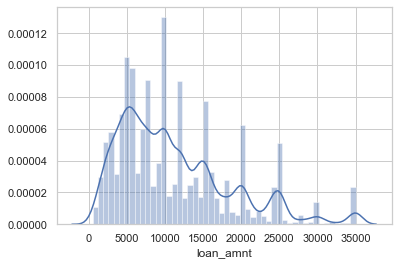

In [26]:
#checking distrbution of loan amount
sns.distplot(loan.loan_amnt)

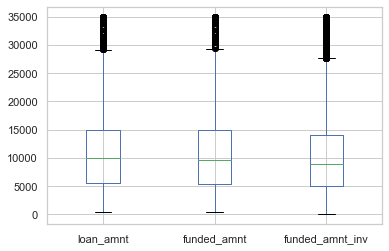

In [27]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);


We need to remove these outliers. We will similarly plot boxplots for other columns containing numerical values.

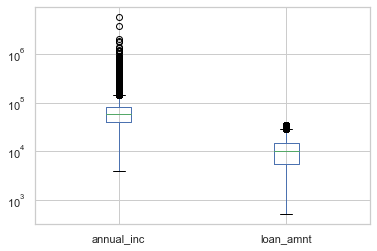

In [28]:
plt.yscale('log')
loan.boxplot(column=['annual_inc','loan_amnt']);

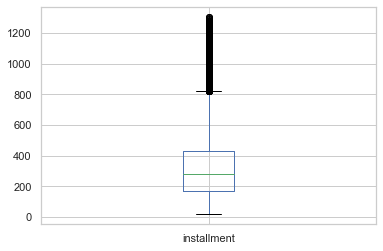

In [29]:
loan.boxplot(column=['installment']);

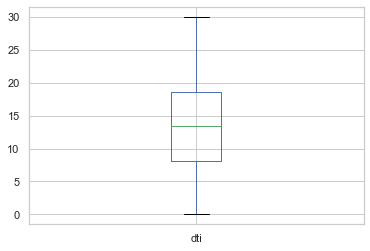

In [30]:
loan.boxplot(column=['dti']);

There are no outliers in dti

In [31]:
#removing rows from annual_inc after 99.5 percentile
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.995)]
loan["annual_inc"].describe()

count    37326.000000 
mean     66745.680660 
std      37319.880387 
min      4000.000000  
25%      41000.000000 
50%      59500.000000 
75%      82000.000000 
max      294000.000000
Name: annual_inc, dtype: float64

Max value is 294000 which is approx 4 times more than mean value, so we will remove the outliers from Annual Income.
Remove Outliers (values from 99 to 100%)


In [32]:
#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    37139.000000
mean     319.147635  
std      199.348065  
min      15.690000   
25%      166.630000  
50%      278.330000  
75%      423.035000  
max      1059.020000 
Name: installment, dtype: float64

Max value is 1059 which is approx 3 times more than mean value, so we will remove the outliers from Installment. Remove Outliers (values from 99 to 100%)

In [33]:
# Purpose of loan
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    47.082582
credit_card           13.072511
other                 9.922184 
home_improvement      7.313067 
major_purchase        5.562885 
small_business        4.523547 
car                   3.893481 
wedding               2.439484 
medical               1.752874 
moving                1.472845 
vacation              0.937020 
house                 0.928943 
educational           0.850858 
renewable_energy      0.247718 
Name: purpose, dtype: float64

**Data Analysis**

**a. Univariate Analysis**

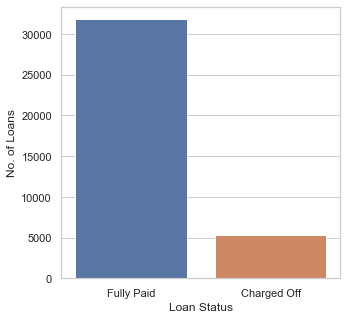

In [34]:
#count plot for loan status
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loan)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

Insights from the above graph: <br>
1. More than 30000 loans are fully paid. <br>
2. Around 5000 loans are charged off.

**Employee_Length vs Count of charged off loans**

In [35]:
#making a new dataframe for loans where status is charged off
charged_off_loans=loan.loc[loan['loan_status']=='Charged Off']
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = loan[loan['loan_status'] == "Fully Paid"]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)

In [36]:
#making a new dataframe for loans where status is charged off
loans_of_36_month_term=loan.loc[loan['term']==' 36 months']
loans_of_36_month_term['issue_d_year']=loans_of_36_month_term['issue_d_year'].astype(str)

#making a new dataframe for loans where status is Fully Paid
loans_of_60_month_term = loan[loan['term'] == ' 60 months']
loans_of_60_month_term['issue_d_year']=loans_of_60_month_term['issue_d_year'].astype(str)

[Text(0, 0, '< 1 year'),
 Text(0, 0, '4 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '10+ years'),
 Text(0, 0, '1 year'),
 Text(0, 0, '9 years'),
 Text(0, 0, '2 years'),
 Text(0, 0, '8 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '5 years'),
 Text(0, 0, '6 years')]

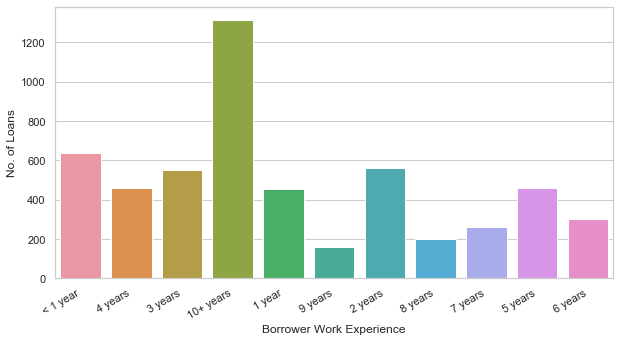

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(charged_off_loans['emp_length'])
ax.set(xlabel='Borrower Work Experience', ylabel='No. of Loans')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

**Insights from the above graph**

Max no. of loans are charged off for people having 10+ years of experience. 

**Home Ownership vs Count of charged off loans**

[Text(0, 0.5, 'No. of Loans'), Text(0.5, 0, 'Home Ownership')]

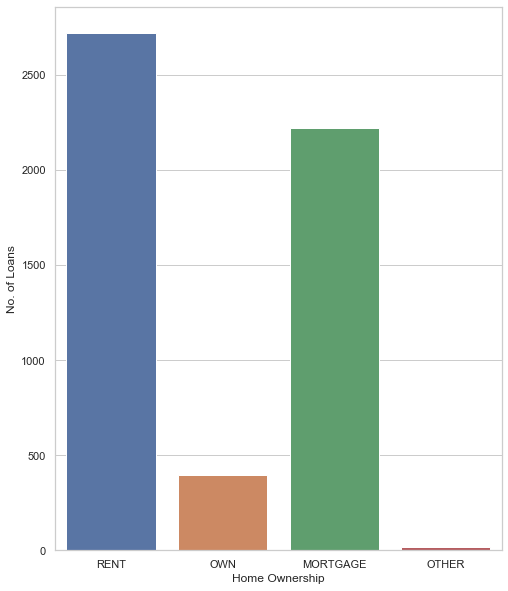

In [38]:
plt.figure(figsize=(8,10))
ax = sns.countplot(charged_off_loans['home_ownership'])
ax.set(xlabel='Home Ownership', ylabel='No. of Loans')

**Insights from the above graph**

Max no. of loans are charged off for people who are living on rent. 

**Loan Status vs Loan Amount of charged off loans**

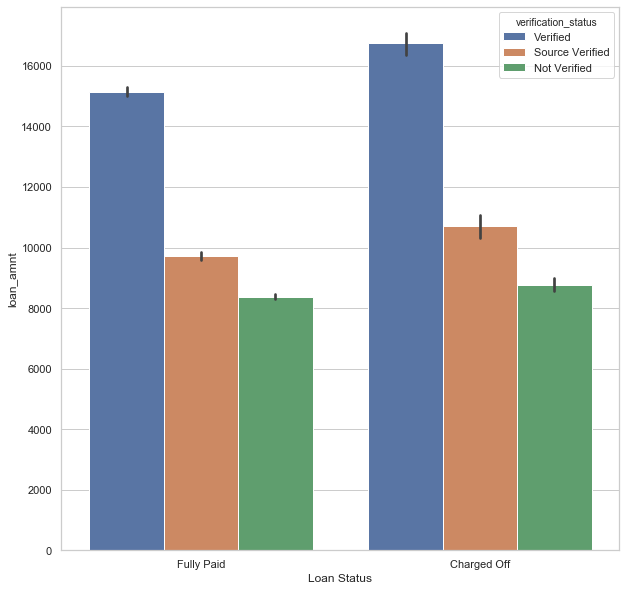

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

**Insights from the above graph**

Max no. of loans are charged off where verification status is **Verified**. 

**Year Wise and Month Wise Distribution of charged-off and fully paid loans**

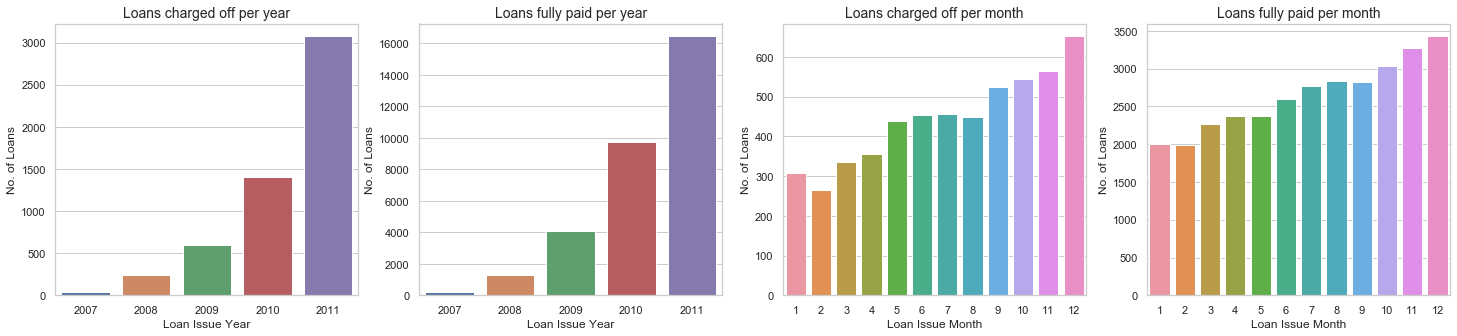

In [40]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(charged_off_loans['issue_d_year'], order=sorted(charged_off_loans.issue_d_year.unique()))
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 2)
ax2=sns.countplot(fully_paid_loans['issue_d_year'], order=sorted(fully_paid_loans.issue_d_year.unique()))
ax2.set_title('Loans fully paid per year', fontsize=14)
ax2.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are charged off
plt.subplot(1, 4, 3)
ax3=sns.countplot(charged_off_loans['issue_d_month'], order=sorted(charged_off_loans.issue_d_month.unique()))
ax3.set_title('Loans charged off per month', fontsize=14)
ax3.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 4)
ax4=sns.countplot(fully_paid_loans['issue_d_month'], order=sorted(fully_paid_loans.issue_d_month.unique()))
ax4.set_title('Loans fully paid per month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()

**Insights from the above graph**

1. No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year **2011**. This is a very positive trend for Lending Club as the requirement of loans are increasing by each year.
2. The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of **December** clearly stating the importance of year-end.

**term-wise distribution of charged-off and fully paid loans vs loan amount**

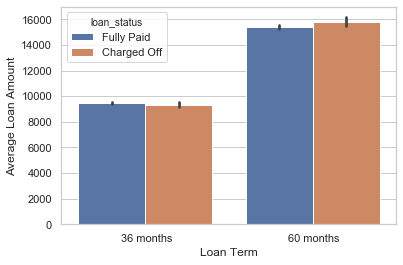

In [41]:
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

**Insights from the above graph**

1. The average loan amount is similar for both the terms for both loan status.  
2. The average loan amount is higher for the 60 month term.

**Term wise Distribution of interest rate**

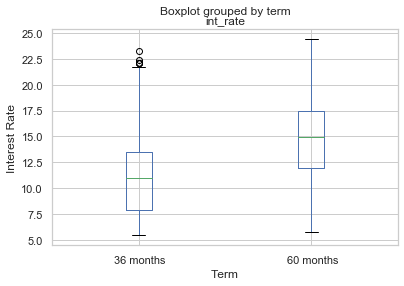

In [42]:
ax = loan.boxplot(column='int_rate', by='term')
ax.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

**Insights from the above graph**

1. The interest rates are higher for 60 month term. 

**b. Bivariate Analysis**

In [43]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [44]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

**Purpose of loan w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,155,1291,1446,10.719
credit_card,508,4347,4855,10.463
debt_consolidation,2660,14826,17486,15.212
educational,52,264,316,16.456
home_improvement,323,2393,2716,11.892
house,59,286,345,17.101
major_purchase,209,1857,2066,10.116
medical,101,550,651,15.515
moving,83,464,547,15.174


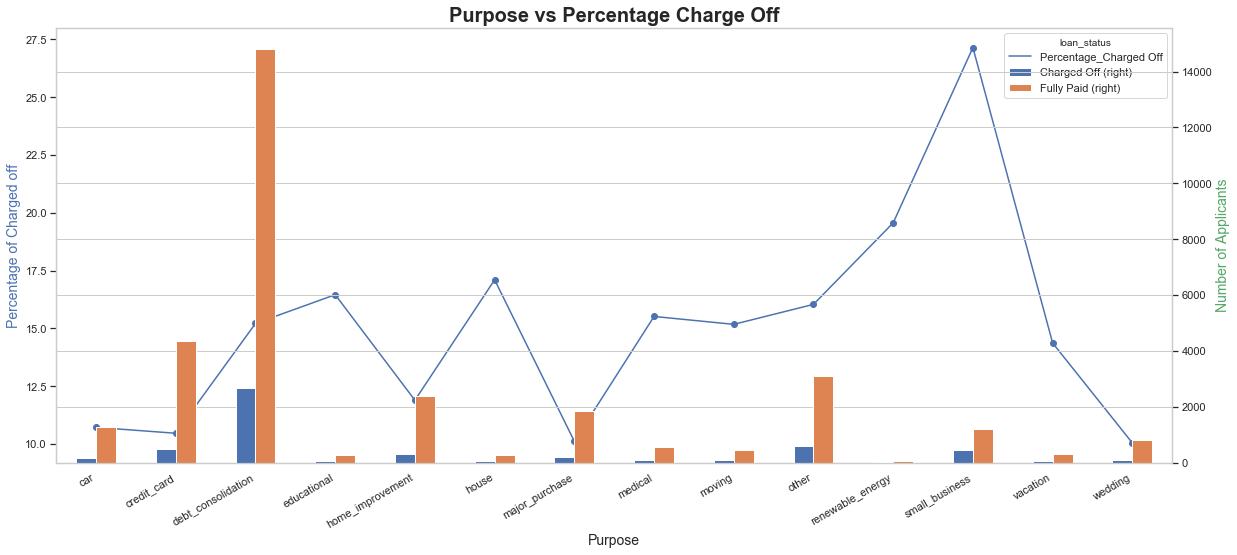

In [45]:
#Plotting the purpose w.r.t % of loans charged off and no. of loan applicants. 
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False) 

Right hand side marker is for number of loan applicants and left hand side marker shows the percentage charged off 

**Insights from the above graph**

1. Maximum no. of loans i.e. 17487 are accepted for the purpose of **Debt Consolidation** out of which 14827 are fully paid and  2660 are charged off i.e. 15.2% <br>
2. Maximum % of a loan being charged off is for the purpose of **small business** and the % is 27.1.

**Loan amount w.r.t % of loans charged off and no. of loan applicants**

In [46]:
#Making bins for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
loan_amnt_range,,,,
0-5000,1218,7812,9030,13.488
5000-10000,1570,10839,12409,12.652
10000-15000,1018,6509,7527,13.525
15000-20000,733,3509,4242,17.280
20000-25000,525,2229,2754,19.063
25000-30000,137,514,651,21.045
30000 and above,155,371,526,29.468


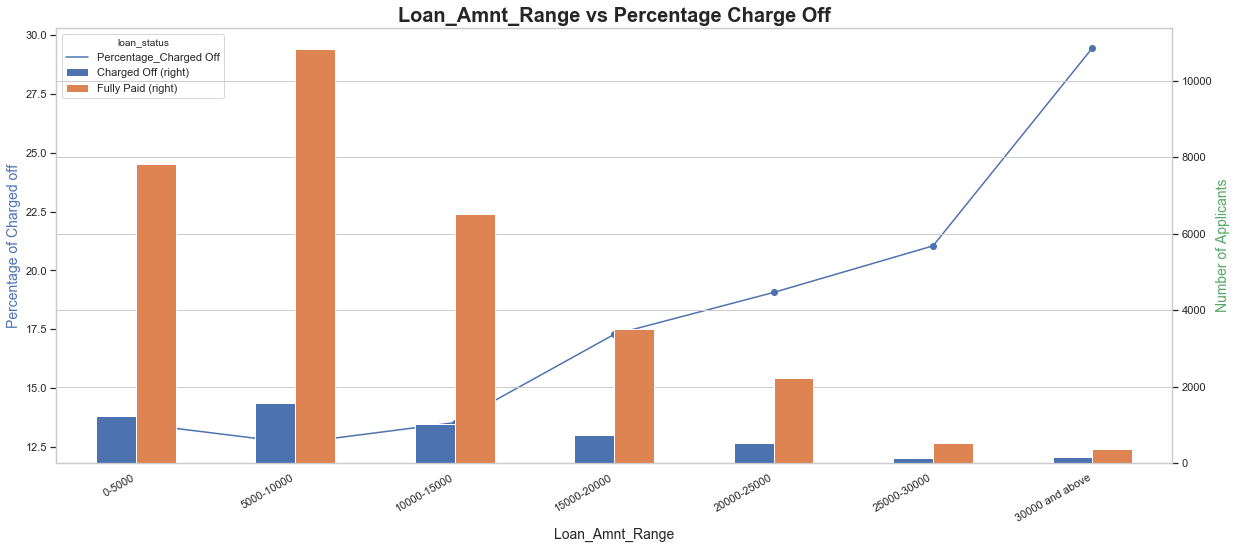

In [47]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
loan_amnt_range = crosstab(loan,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df =loan,col ='loan_amnt_range',stacked=False) 

**Insights from the above graph**

1. As the **loan amount** increases, The probablity of loan being charged off increases. It is maximum, **29.47%** for the amount of **30,000+** <br>
2. The maximum no. of loans, **12410** are applied where the **loan amount** ranges between 5000 and 10000. <br>

**Annual Income Range w.r.t % of loans charged off and no. of loan applicants**

In [48]:
#Making bins for annual_inc_range
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
annual_inc_range,,,,
0-25000,419,1855,2274,18.426
25000-50000,2019,10384,12403,16.278
50000-75000,1643,9795,11438,14.364
75000-100000,718,5199,5917,12.135
100000 and above,557,4550,5107,10.907


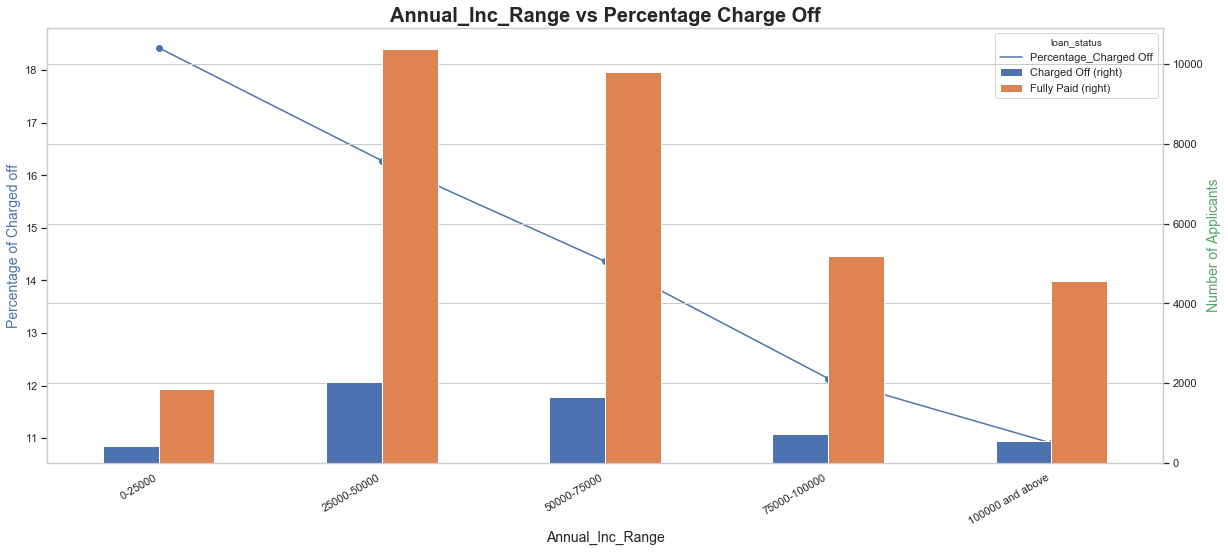

In [49]:
#Plotting the annual_inc_range w.r.t % of loans charged off and no. of loan applicants. 
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range',stacked=False) 

**Insights from the above graph**

1. As the Annual Income is increasing, The % of loan getting charged off is decreasing.It is minimum for income more than 100000 and maximum where annual income less than 25000. <br>
2. Maximum loans are applied by applicants whose annual income is between 25000 and 75000.

**Interest Rate w.r.t % of loans charged off and no. of loan applicants**

In [50]:
#Making bins for interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
int_rate_range,,,,
0-7.5,230,4859,5089,4.520
7.5-10,530,6118,6648,7.972
10-12.5,1176,7918,9094,12.932
12.5-15,1410,7219,8629,16.340
15 and above,1725,5215,6940,24.856


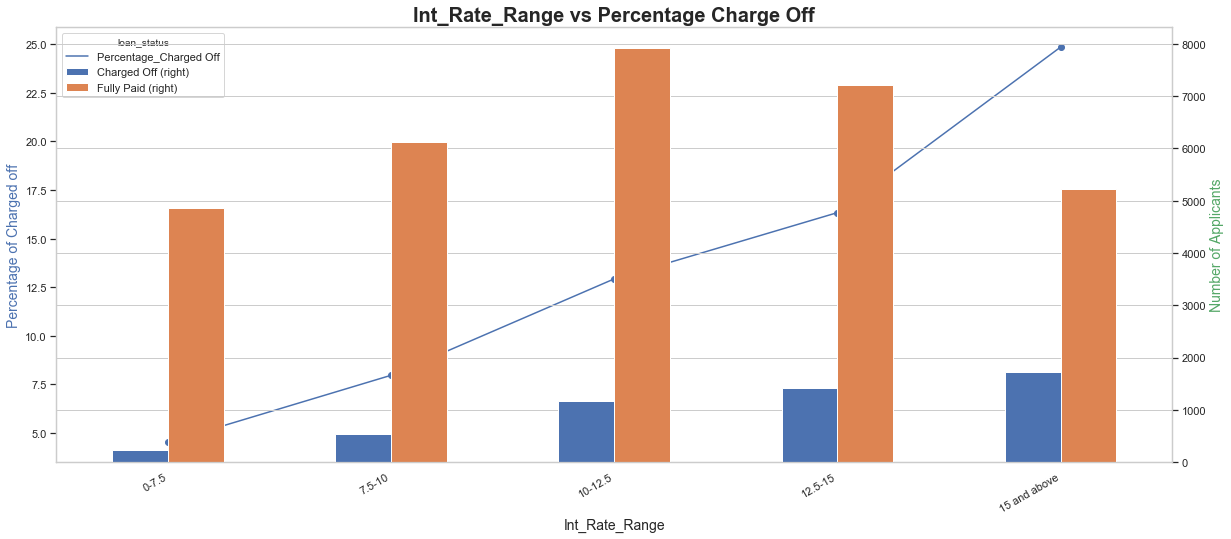

In [51]:
#Plotting the int_rate_range w.r.t % of loans charged off and no. of loan applicants. 
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range',stacked=False) 

**Insights from the above graph**

1. As the Interest Rate is increasing, The % of loan getting charged off is also increasing.It is minimum for interest rate below 7.5. <br>
2. Maximum loans are applied by applicants where the interest rate is between 10 and 15%. <br>

**Grade w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
grade,,,,
A,557,9027,9584,5.812
B,1346,9921,11267,11.946
C,1279,6311,7590,16.851
D,1077,3829,4906,21.953
E,691,1868,2559,27.003
F,309,636,945,32.698
G,97,191,288,33.681


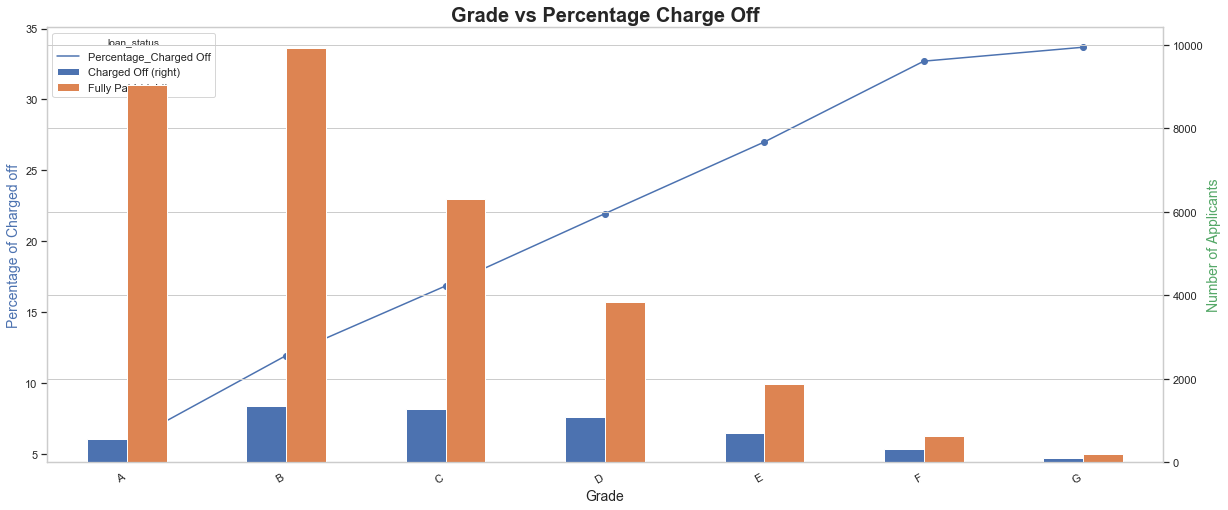

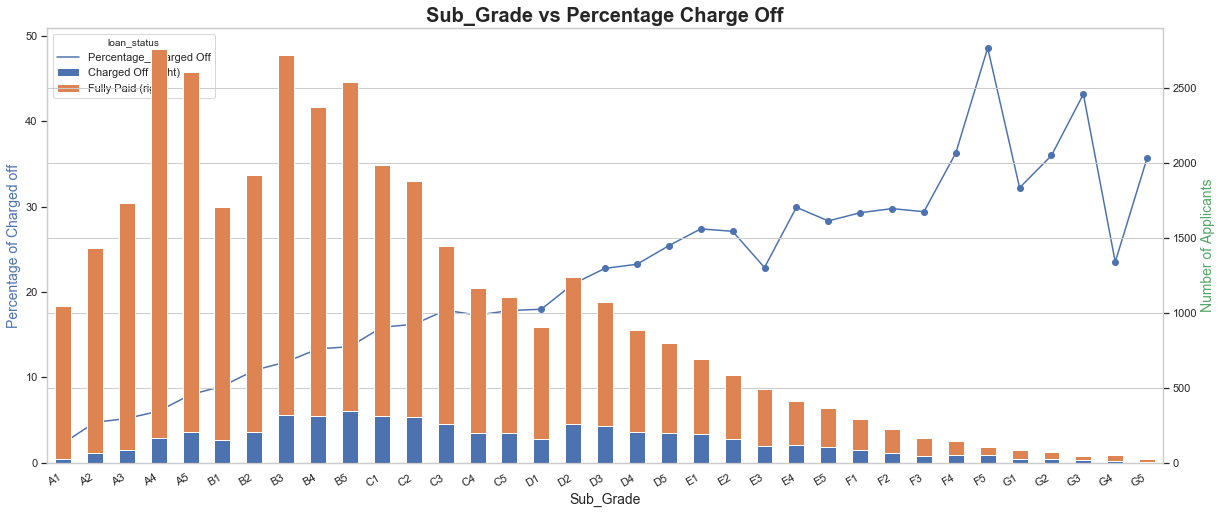

In [52]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False) 
#Plotting the sub grade w.r.t % of loans charged off and no. of loan applicants.
bivariate_prob(df =loan,col ='sub_grade')

**Insights from the above graph**

1. Grade **A and B**  loans are **safe**. Within these the sub-grades **A4 and B3** have the highest number of loan applicants. <br>
2. Grade  **E, F, G**  loans are less safe as compared to others.

**Term w.r.t % of loans charged off and no. of loan applicants**

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
term,,,,
36 months,3040,24903,27943,10.879
60 months,2316,6880,9196,25.185


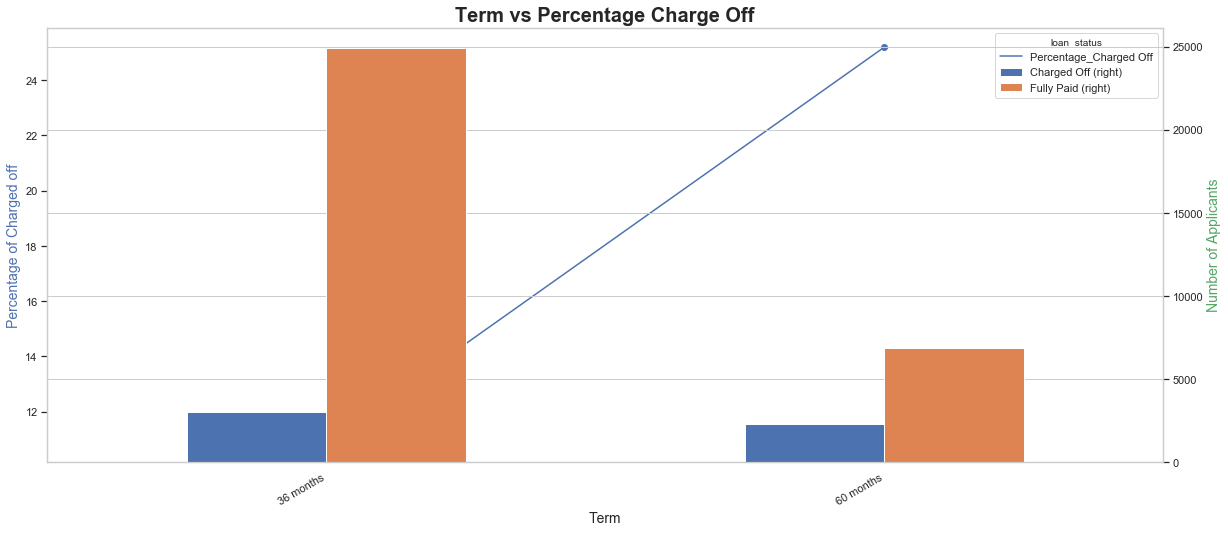

In [53]:
#Plotting the term w.r.t % of loans charged off and no. of loan applicants. 
term = crosstab(loan,'term')
display(term)

bivariate_prob(df =loan,col ='term',stacked=False)

**Insights from the above graph**

1. % of loans getting charged-off for 60 month term i.i. **25.2%** is higher as compared to 36 month term i.e. **10.9%** <br>
2. Total no. of loan applications are very high for 36 month term as compared to 60 month term.

**Address State w.r.t % of loans charged off and no. of loan applicants**

In [54]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,14,59,73,19.178
AL,51,362,413,12.349
AR,26,200,226,11.504
AZ,113,685,798,14.160
CA,1065,5630,6695,15.907
CO,91,638,729,12.483
CT,89,604,693,12.843
DC,15,195,210,7.143
DE,12,98,110,10.909


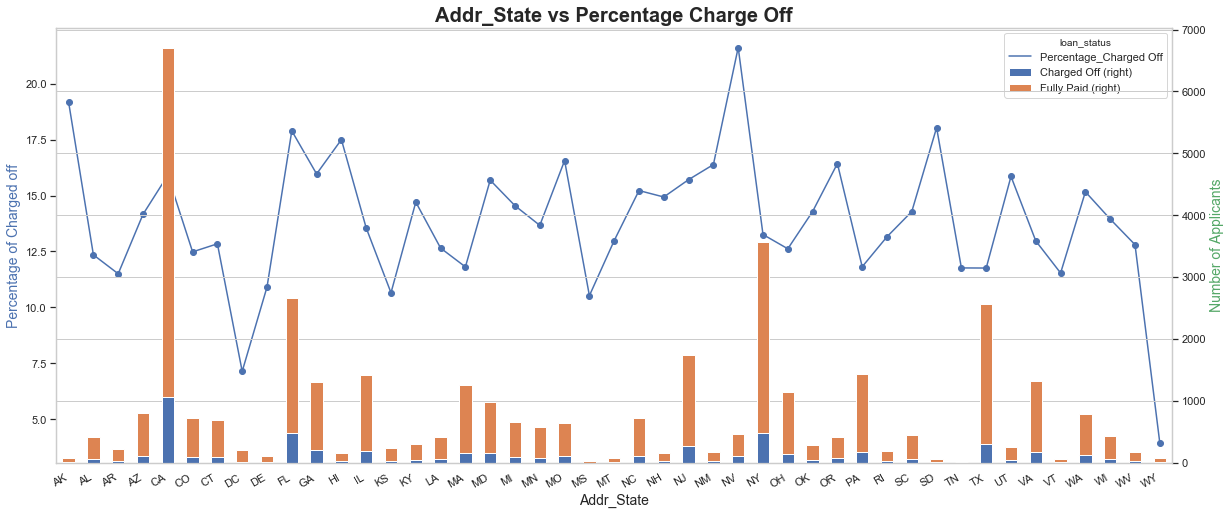

In [55]:
states = crosstab(loan_filter_states,'addr_state')
display(states)

bivariate_prob(df =loan_filter_states,col ='addr_state')

**Insights from the above graph**

1. Maximum no. of loans are applied by people from CA.
2. Maximum no. of loans are charged off for people of NV.

**Term wise and year wise comaprison of interest rate of fully paid and charged off loans**

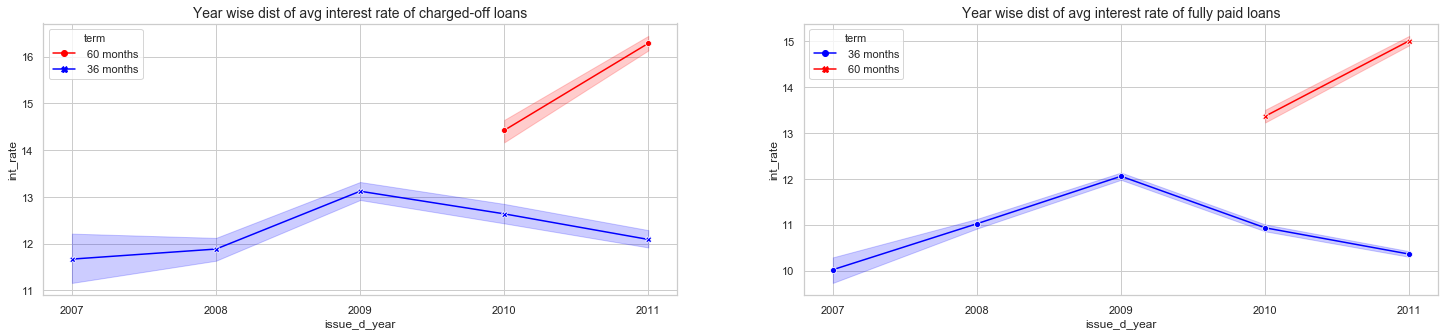

In [56]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
palette ={" 60 months":"red"," 36 months":"blue"}
ax1=sns.lineplot(x="issue_d_year", y="int_rate", data=charged_off_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax1.locator_params(integer=True)
ax1.set_title('Year wise dist of avg interest rate of charged-off loans', fontsize=14)

plt.subplot(1, 2, 2)
ax2=sns.lineplot(x="issue_d_year", y="int_rate", data=fully_paid_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax2.set_title('Year wise dist of avg interest rate of fully paid loans', fontsize=14)
ax2.locator_params(integer=True)

**Insights from the above graph**

1. Avg Interest Rate is increasing for charged off and fully paid loans year-wise in 36 month term but after inclusion of 60 months term in 2010, Avg Interest Rate decreaesd significantly for charged off and fully paid loans. <br>
2. 60 month term was introduced in 2010. <br>
3. Avg interest rate is higher for 60 month term. 

**Trend of Interest rate of fully paid and charged off loans across purpose**

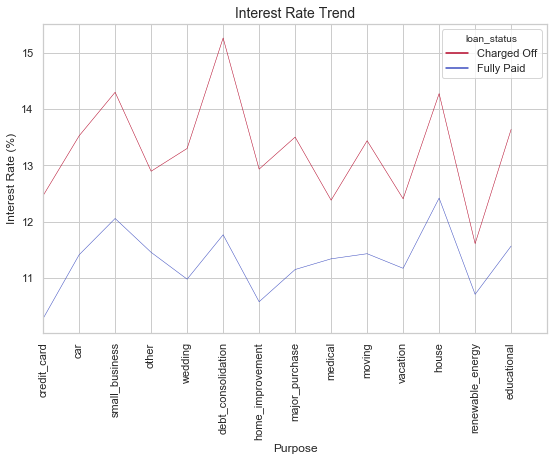

In [57]:
fig = plt.figure(figsize=(10,12))
cmap = plt.cm.coolwarm_r
ax3 = fig.add_subplot(212)
by_interest = loan.groupby(['purpose', 'loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Interest Rate Trend', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)
ax3.set_xlabel('Purpose', fontsize=12)


# get the values we want displayed as tick labels
tick_labels = tuple(loan['purpose'].unique())
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max + 1), tick_labels, rotation=90) 
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))
for line in ax3.lines:
    line.set_linewidth(0.5)

**Insights from above graph**

1. Interest Rate is higher for charged off loans across all purposes.

**Term wise and year wise comaprison of loan amount of fully paid and charged off loans**

[Text(0, 0.5, 'Loan Amount'), Text(0.5, 0, 'Loan Issue Year')]

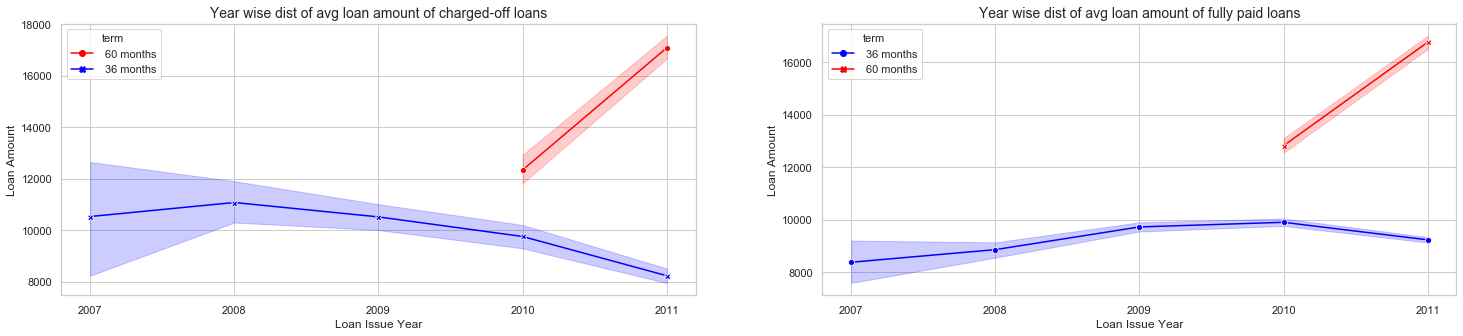

In [58]:
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
palette ={" 60 months":"red"," 36 months":"blue"}
ax1=sns.lineplot(x="issue_d_year", y="loan_amnt", data=charged_off_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax1.locator_params(integer=True)
ax1.set_title('Year wise dist of avg loan amount of charged-off loans', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

plt.subplot(1, 2, 2)
ax2=sns.lineplot(x="issue_d_year", y="loan_amnt", data=fully_paid_loans, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax2.set_title('Year wise dist of avg loan amount of fully paid loans', fontsize=14)
ax2.locator_params(integer=True)
ax2.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

**Insights from the above graph**

1. Avg Loan Amount is decreasing every year for charged off loans in 36 month term  <br>
2. Avg Loan Amount is increasing every year for fully paid loans in 36 month term till 2010. It decreases slightly in 2011 <br>
3. Avg Loan Amount is increasing for 60 month term for both fully paid and charged off loans. 

In [59]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,issue_d_month,issue_d_year
loan_amnt,1.000000,0.980722,0.933451,0.299656,0.928961,0.403025,0.069655,0.050080,0.104362
funded_amnt,0.980722,1.000000,0.952608,0.304437,0.956077,0.398384,0.069455,0.039321,0.115349
funded_amnt_inv,0.933451,0.952608,1.000000,0.297103,0.897861,0.379768,0.078140,0.066807,0.252646
int_rate,0.299656,0.304437,0.297103,1.000000,0.276191,0.062920,0.114571,0.026708,0.041293
installment,0.928961,0.956077,0.897861,0.276191,1.000000,0.400274,0.059673,0.025925,0.042031
annual_inc,0.403025,0.398384,0.379768,0.062920,0.400274,1.000000,-0.120099,0.013574,0.031979
dti,0.069655,0.069455,0.078140,0.114571,0.059673,-0.120099,1.000000,0.013072,0.093752
issue_d_month,0.050080,0.039321,0.066807,0.026708,0.025925,0.013574,0.013072,1.000000,-0.036435
issue_d_year,0.104362,0.115349,0.252646,0.041293,0.042031,0.031979,0.093752,-0.036435,1.000000


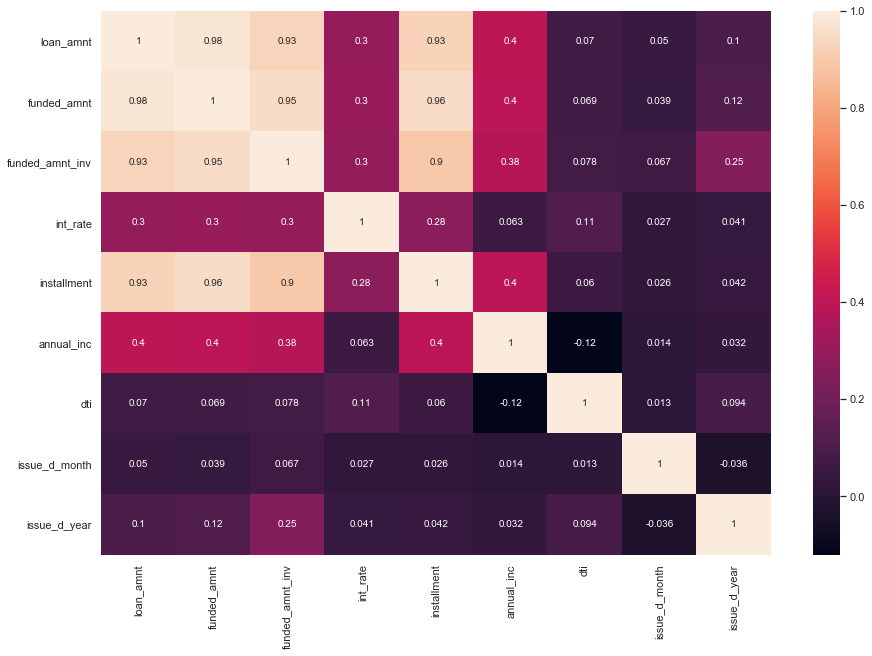

In [60]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)

# fix for mpl bug that cuts off top/bottom of seaborn
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

1. Loan Amount, Funded Amount, Funded Amount invested and installment are highly correlated with each other.
2. Annual Income is negatively correlated with DTI.

**Recommendations** <br>
1. Lending Club should be wary of the loans where the purpose is **Small Business** as the percentage of a loan being charged off is maximum **27.1%**. Accepting loans for the purpose of **Weddings,major purchase, car and credit card** is highly recommended. <br>
2. Higher the loan amount, the higher the chances of loan being charged off. Therefore Lending Company should consider accepting loans of lower amount.The maximum no. of loans, **12410** are applied where the **loan amount** ranges between 5000 and 10000. For this range the probablity of the the loan getting charged off is very less. Hence the risk factor is low for lending club. <br>
3. Lending Club should consider accepting more loans from applicants whose annual income is **greater than 100000** as their probablity of charge off is minimum. <br>
4. Lending Club should consider accepting more loans where interest rate is **less than 7.5%** as their probablity of charge off is minimum.<br>
5. Lending Club should consider accepting more loans of grade **A and B**. It should be cautious of loans falling in grades **E,F and G**
6. Lending Club should consider accepting more loans from people who **owns** a house. <br>
7. The number of loan applicants are increasing with each passing year bringing more business to Lending Club which is leading to more loans getting accepted as well as more loans getting charged off. Moreover the last few months of the year are quite critical as most of the loans are either fully paid or charged off at that time.  <br>
8. Lending Club should accept more loans for the term of **36 months** as the % of charged off loans is less and the no. of loan applicants are more. Also the avg fully paid loan amount is increasing over the years and avg charged off lon amount is decreasing over the years. <br>